In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict

In [2]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi
from allensdk.core.structure_tree import StructureTree

mcc = MouseConnectivityCache(resolution=100)
structure_tree = mcc.get_structure_tree()

oapi = OntologiesApi()
structure_set_ids = structure_tree.get_structure_sets()
struct_df = pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

In [3]:
def add_children(g: nx.DiGraph(), structure_tree: StructureTree, src_id: int, level: int):
    src = structure_tree.get_structures_by_id([src_id])[0]
    children = structure_tree.children([src_id])[0]
    for child in children:
        src_name = '\n'.join(src['name'].split(' '))
        tgt_name = '\n'.join(child['name'].split(' '))
        g.add_node(tgt_name, lvl=level)
        g.add_edge(src_name, tgt_name)

    return g, children

In [4]:
cerebrum = structure_tree.get_structures_by_name(['Cerebrum'])[0]

g = nx.DiGraph()
g.add_node('\n'.join(cerebrum['name'].split(' ')), lvl=0)
g.nodes

NodeView(('Cerebrum',))

In [5]:
levels = 2

lvl = 0
src_ids = [cerebrum['id']]

print(lvl, src_ids)

for lvl in range(1, levels + 1):
    new_leaves = []
    for i in src_ids:
        g, children = add_children(g, structure_tree, i, lvl)
        for child in children:
            new_leaves.append(child['id'])
    src_ids = new_leaves
    print(lvl, src_ids)

0 [567]
1 [688, 623]
2 [695, 703, 477, 803]


In [6]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

In [7]:
lvl2c = {
    0: 'C7',
    1: 'lightskyblue',
    2: 'gold',
}
node2c = {i: lvl2c[n[1]['lvl']] for i, n in enumerate(g.nodes(data=True))}

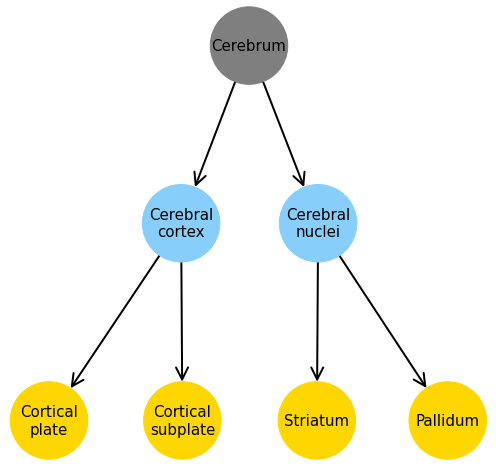

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.6))

pos = graphviz_layout(g, prog='dot', root='Cerebrum')#, args='-Gnodesep=5')
nx.draw(
    G=g,
    pos=pos,
    with_labels=True,
    arrows=True,
    arrowsize=30,
    arrowstyle='->',
    width=2,
    node_size=6000,
    font_size=15,
    edge_color='k',
    node_color=node2c.values(),
    ax=ax,
)
fig.tight_layout()
fig.savefig('cerebrum_2lvls.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
cerebrum = structure_tree.get_structures_by_name(['Cerebrum'])[0]

g = nx.DiGraph()
g.add_node('\n'.join(cerebrum['name'].split(' ')), lvl=0)
g.nodes

NodeView(('Cerebrum',))

In [10]:
levels = 3

lvl = 0
src_ids = [cerebrum['id']]

print(lvl, src_ids)

for lvl in range(1, levels + 1):
    new_leaves = []
    for i in src_ids:
        g, children = add_children(g, structure_tree, i, lvl)
        for child in children:
            new_leaves.append(child['id'])
    src_ids = new_leaves
    print(lvl, src_ids)

0 [567]
1 [688, 623]
2 [695, 703, 477, 803]
3 [315, 698, 1089, 16, 583, 942, 131, 295, 319, 780, 485, 493, 275, 278, 818, 835, 826, 809]


In [11]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

In [12]:
lvl2c = {
    0: 'C7',
    1: 'lightskyblue',
    2: 'gold',
    3: 'yellowgreen',
}
node2c = {i: lvl2c[n[1]['lvl']] for i, n in enumerate(g.nodes(data=True))}

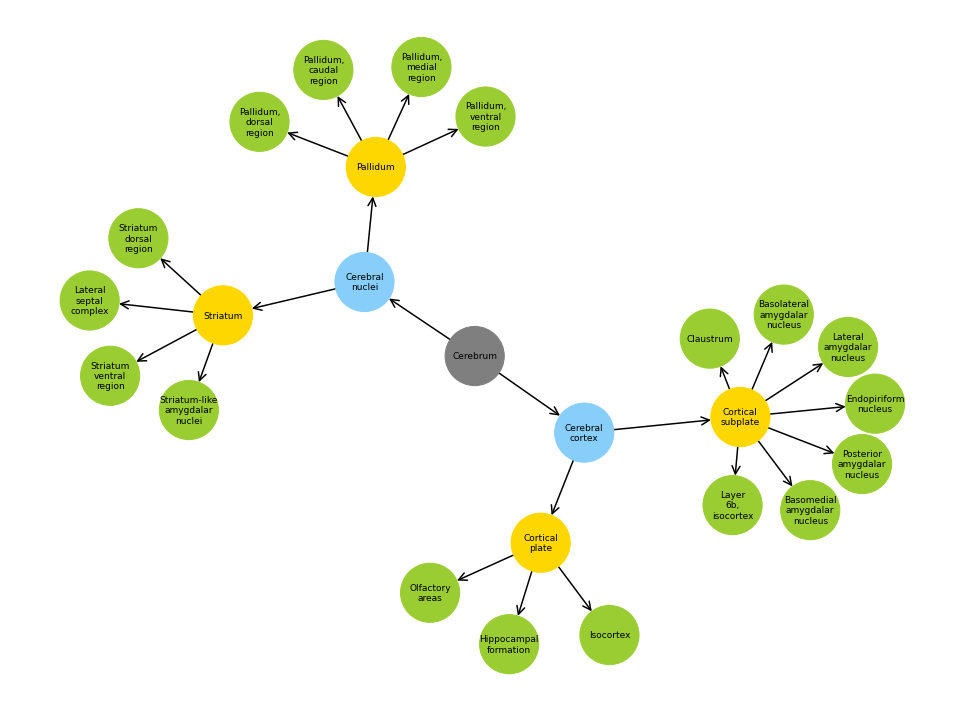

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(13.5, 10))

pos = graphviz_layout(g, prog='neato', root='Cerebrum')
nx.draw(
    G=g,
    pos=pos,
    with_labels=True,
    arrows=True,
    arrowsize=20,
    arrowstyle='->',
    width=1.5,
    node_size=3500,
    font_size=9,
    edge_color='k',
    node_color=node2c.values(),
    ax=ax,
)
fig.tight_layout()
fig.savefig('cerebrum_3lvls.pdf', dpi=300, bbox_inches='tight')
plt.show()